# 메모   
- 주요 축제를 개최하는 바닷가 근처에 대형아울렛   
- 초당두부 축제를 겨울에 개최
- 한과마을을 활용한 환과 축제

In [56]:
# colab 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [57]:
import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

In [58]:
# 라이브러리 읽어오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [59]:
data = pd.read_csv("/content/gdrive/MyDrive/23년 여름ai아카데미/1801_22.05강릉관광데이터_최종.csv")

In [60]:
df = pd.DataFrame(data=data)

In [61]:
df.head()

,기준연월,지역명,방문자 수,숙박방문자 수,신용카드 소비액(천원),식음료업(천원),쇼핑업(천원),숙박업(천원),여가서비스업(천원),운송업(천원),...,목적지 유형 검색량(자연관광),목적지 유형 검색량(문화관광),목적지 유형 검색량(역사관광),목적지 유형 검색량(체험관광),목적지 유형 검색량(레저스포츠),여행유형/트렌드별 검색량(레포츠),여행유형/트렌드별 검색량(휴식/힐링),여행유형/트렌드별 검색량(체험),여행유형/트렌드별 검색량(미식),여행유형/트렌드별 검색량(기타)
0,2018년01월,강원도 강릉시,2467762,414591,14220150,9347520,299159,1414465,431930,28775,...,36043,28039,1182,1116,8662,6739,2945,919,628,1395
1,2018년02월,강원도 강릉시,3100165,484107,13567573,9374136,2730917,1074072,356156,30733,...,22875,24202,1049,613,28391,9635,3000,714,546,1486
2,2018년03월,강원도 강릉시,2640196,419178,14881446,9497487,3328785,1398589,629109,23683,...,30260,21217,1829,1093,12009,5668,2362,388,523,905
3,2018년04월,강원도 강릉시,2240230,382550,14984917,9645479,3111638,1472622,707700,33383,...,56415,20613,11574,1548,9276,2448,2216,590,544,798
4,2018년05월,강원도 강릉시,2594365,473350,16381068,10502482,3310698,1718209,796171,48476,...,74911,29191,14994,3277,12386,3934,2674,481,694,784


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   기준연월                  65 non-null     object
 1   지역명                   65 non-null     object
 2   방문자 수                 65 non-null     int64 
 3   숙박방문자 수               65 non-null     int64 
 4   신용카드 소비액(천원)          65 non-null     int64 
 5   식음료업(천원)              65 non-null     int64 
 6   쇼핑업(천원)               65 non-null     int64 
 7   숙박업(천원)               65 non-null     int64 
 8   여가서비스업(천원)            65 non-null     int64 
 9   운송업(천원)               65 non-null     int64 
 10  여행업(천원)               65 non-null     int64 
 11  무박                    65 non-null     int64 
 12  1박                    65 non-null     int64 
 13  2박                    65 non-null     int64 
 14  3박이상                  65 non-null     int64 
 15  평균 체류시간(분)            65 non-null     int6

In [63]:
df = df.drop(columns = ['지역명'])
df.head()

,기준연월,방문자 수,숙박방문자 수,신용카드 소비액(천원),식음료업(천원),쇼핑업(천원),숙박업(천원),여가서비스업(천원),운송업(천원),여행업(천원),...,목적지 유형 검색량(자연관광),목적지 유형 검색량(문화관광),목적지 유형 검색량(역사관광),목적지 유형 검색량(체험관광),목적지 유형 검색량(레저스포츠),여행유형/트렌드별 검색량(레포츠),여행유형/트렌드별 검색량(휴식/힐링),여행유형/트렌드별 검색량(체험),여행유형/트렌드별 검색량(미식),여행유형/트렌드별 검색량(기타)
0,2018년01월,2467762,414591,14220150,9347520,299159,1414465,431930,28775,5872,...,36043,28039,1182,1116,8662,6739,2945,919,628,1395
1,2018년02월,3100165,484107,13567573,9374136,2730917,1074072,356156,30733,1559,...,22875,24202,1049,613,28391,9635,3000,714,546,1486
2,2018년03월,2640196,419178,14881446,9497487,3328785,1398589,629109,23683,3792,...,30260,21217,1829,1093,12009,5668,2362,388,523,905
3,2018년04월,2240230,382550,14984917,9645479,3111638,1472622,707700,33383,14095,...,56415,20613,11574,1548,9276,2448,2216,590,544,798
4,2018년05월,2594365,473350,16381068,10502482,3310698,1718209,796171,48476,5032,...,74911,29191,14994,3277,12386,3934,2674,481,694,784


In [64]:
df.columns = df.columns.str.replace(' ','')

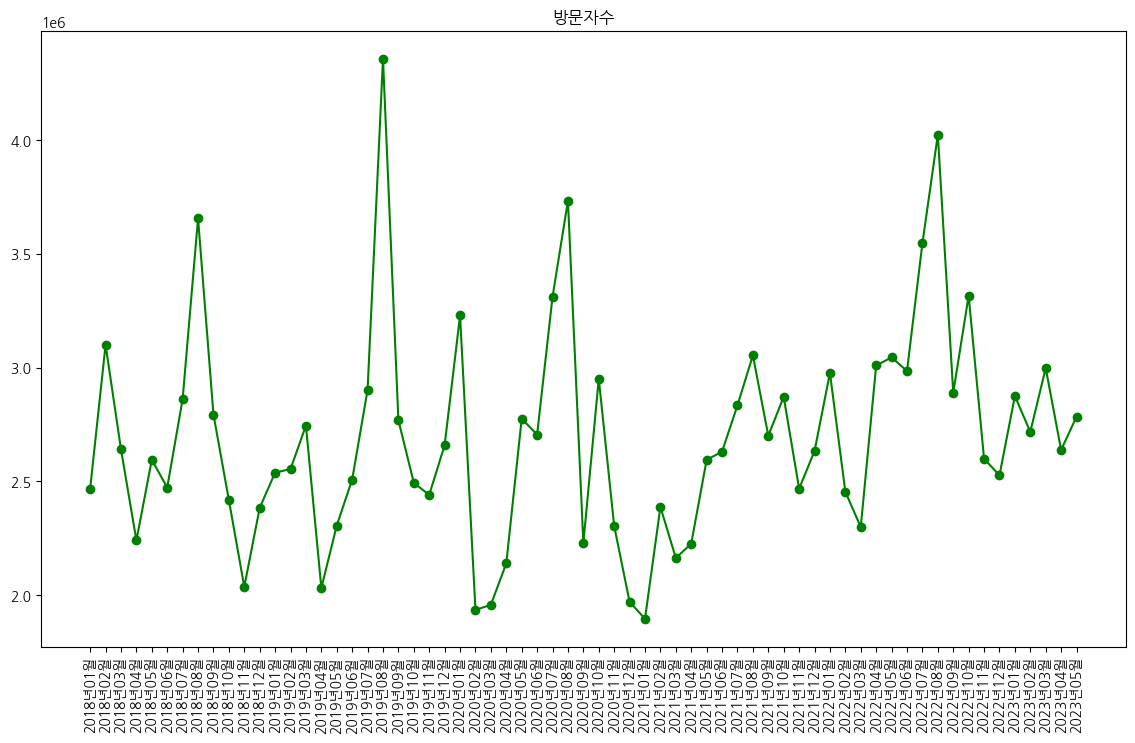

In [65]:
# 그래프를 그릴 도화지 준비하기
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(df['기준연월'], df['방문자수'], color='green', marker='o', linestyle='solid')
plt.title("방문자수")
plt.xticks(rotation=90)
plt.show()

In [66]:
총방문자수 = df['방문자수'].sum()
총숙박방문자수 = df['숙박방문자수'].sum()
숙박방문자수퍼센 =(총숙박방문자수/총방문자수)*100
당일방문자수퍼센 = ((총방문자수-총숙박방문자수)/총방문자수)*100

In [67]:
size = [당일방문자수퍼센, 숙박방문자수퍼센]
labels = ['당일방문자수', '숙박시설이용방문자수']
colors = ['cyan', 'blue']
explode = [0.1, 0]

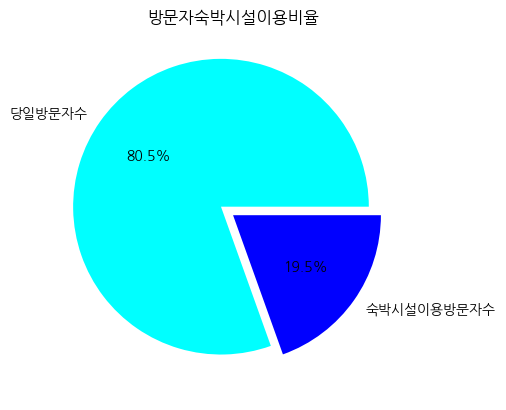

In [68]:
plt.pie(size, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('방문자숙박시설이용비율')
plt.show()

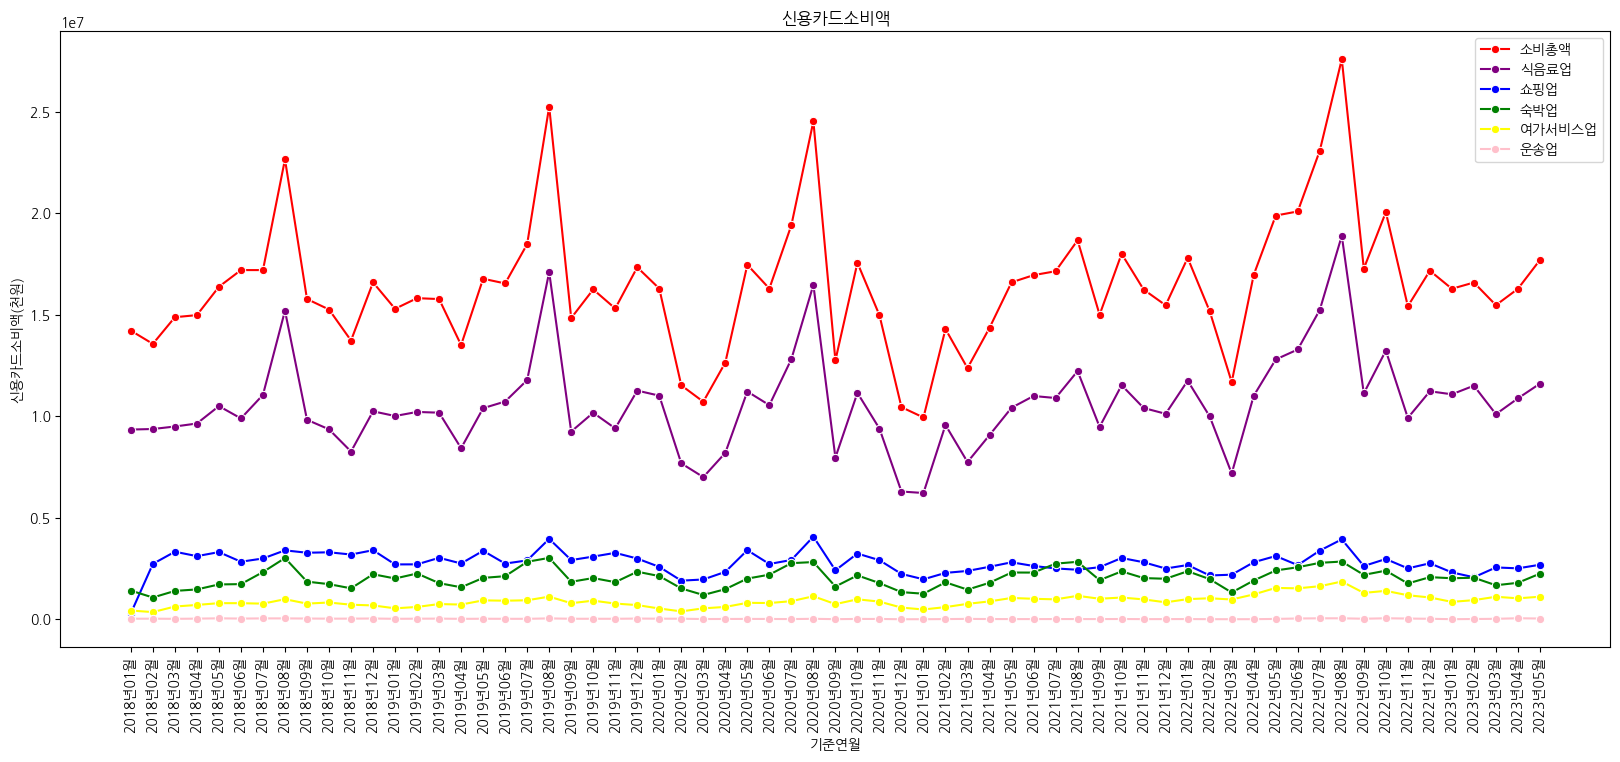

In [69]:
fig, ax = plt.subplots(1,1, figsize=(20,8))
ax= sns.lineplot(x='기준연월', y='신용카드소비액(천원)', data=df, color='red', marker='o', label='소비총액')
ax= sns.lineplot(x='기준연월', y='식음료업(천원)', data=df, color='purple',  marker='o', label='식음료업')
ax= sns.lineplot(x='기준연월', y='쇼핑업(천원)', data=df, color='blue',  marker='o', label='쇼핑업')
ax= sns.lineplot(x='기준연월', y='숙박업(천원)', data=df, color='green',  marker='o', label='숙박업')
ax= sns.lineplot(x='기준연월', y='여가서비스업(천원)', data=df, color='yellow',  marker='o', label='여가서비스업')
ax= sns.lineplot(x='기준연월', y='운송업(천원)', data=df, color='pink',  marker='o', label='운송업')
plt.title('신용카드소비액')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [70]:
식음료업 = df['식음료업(천원)'].sum()
쇼핑업 = df['쇼핑업(천원)'].sum()
숙박업 = df['숙박업(천원)'].sum()
여가서비스업 = df['여가서비스업(천원)'].sum()
운송업 = df['운송업(천원)'].sum()

In [71]:
value = [식음료업, 쇼핑업, 숙박업, 여가서비스업, 운송업]
x_label = ['식음료업', '쇼핑업', '숙박업', '여가서비스업', '운송업']


Text(0.5, 1.0, '신용카드소비총액비율')

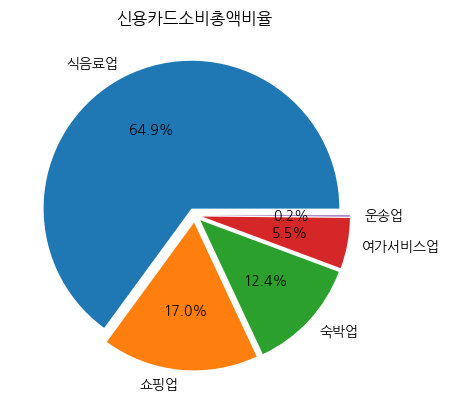

In [72]:
plt.pie(value, labels=x_label,autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05,0.05])
plt.title('신용카드소비총액비율')

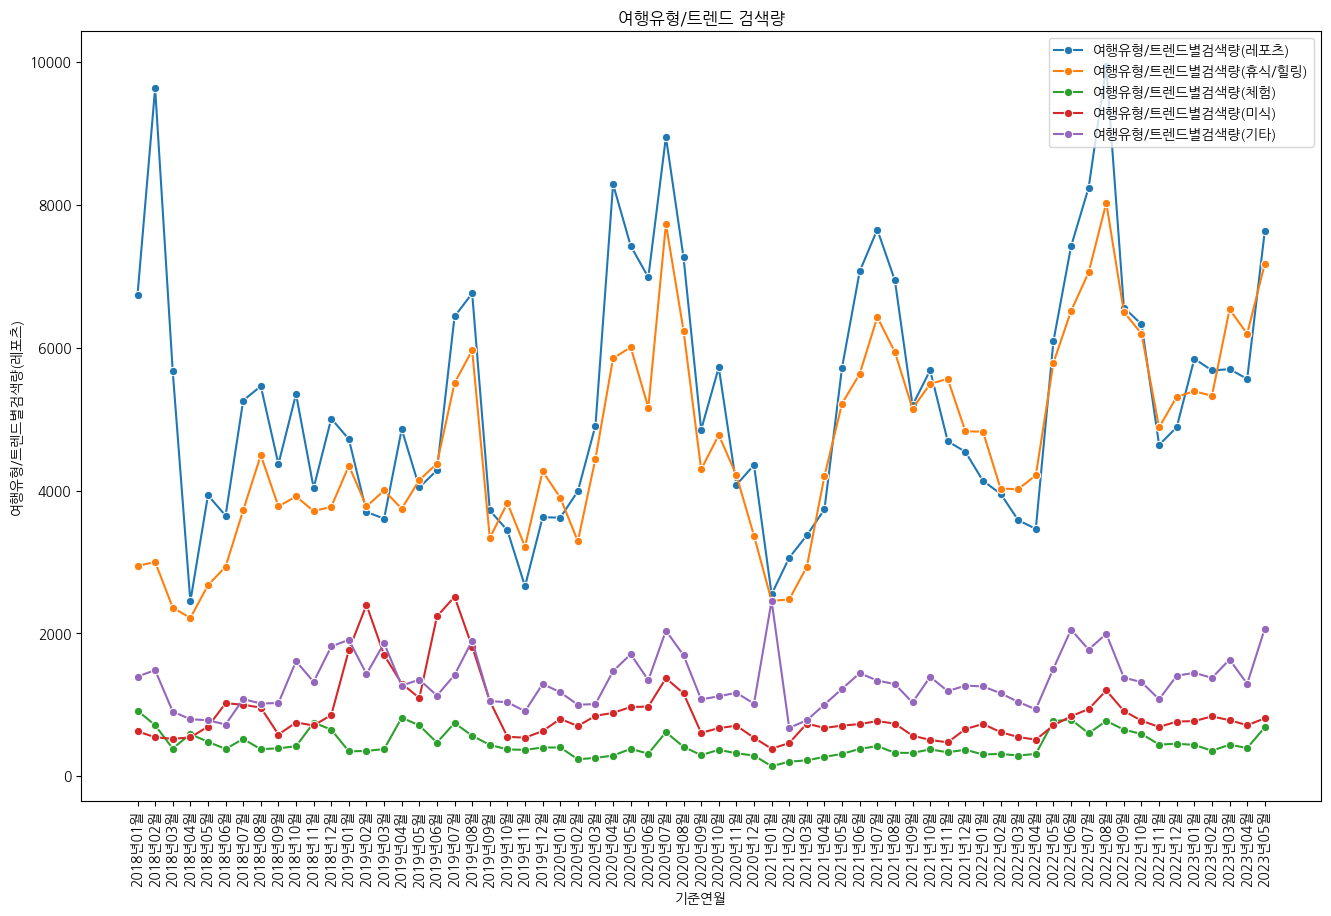

In [46]:
fig, ax = plt.subplots(1,1, figsize=(16,10))

ax = sns.lineplot(x='기준연월', y='여행유형/트렌드별검색량(레포츠)', data=df, marker='o', label='여행유형/트렌드별검색량(레포츠)')
ax = sns.lineplot(x='기준연월', y='여행유형/트렌드별검색량(휴식/힐링)', data=df, marker='o', label='여행유형/트렌드별검색량(휴식/힐링)')
ax = sns.lineplot(x='기준연월', y='여행유형/트렌드별검색량(체험)', data=df, marker='o', label='여행유형/트렌드별검색량(체험)')
ax = sns.lineplot(x='기준연월', y='여행유형/트렌드별검색량(미식)', data=df, marker='o', label='여행유형/트렌드별검색량(미식)')
ax = sns.lineplot(x='기준연월', y='여행유형/트렌드별검색량(기타)', data=df, marker='o', label='여행유형/트렌드별검색량(기타)')
plt.xticks(rotation=90)
plt.title('여행유형/트렌드 검색량')
plt.show()

In [47]:
트렌드레포츠 = df['여행유형/트렌드별검색량(레포츠)'].sum
트렌드휴식 = df['여행유형/트렌드별검색량(휴식/힐링)'].sum
트렌드체험 = df['여행유형/트렌드별검색량(체험)'].sum
트렌드미식 = df['여행유형/트렌드별검색량(미식)'].sum
트렌드기타 = df['여행유형/트렌드별검색량(기타)'].sum

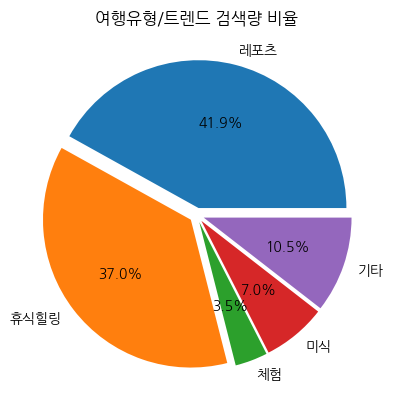

In [48]:
value2 = [트렌드레포츠(), 트렌드휴식(), 트렌드체험(), 트렌드미식(), 트렌드기타()]
label2 = ['레포츠', '휴식힐링', '체험', '미식', '기타']

plt.pie(value2, labels=label2, autopct='%1.1f%%', explode=[0.05,0.05,0.05,0.05,0.05])
plt.title('여행유형/트렌드 검색량 비율')
plt.show()

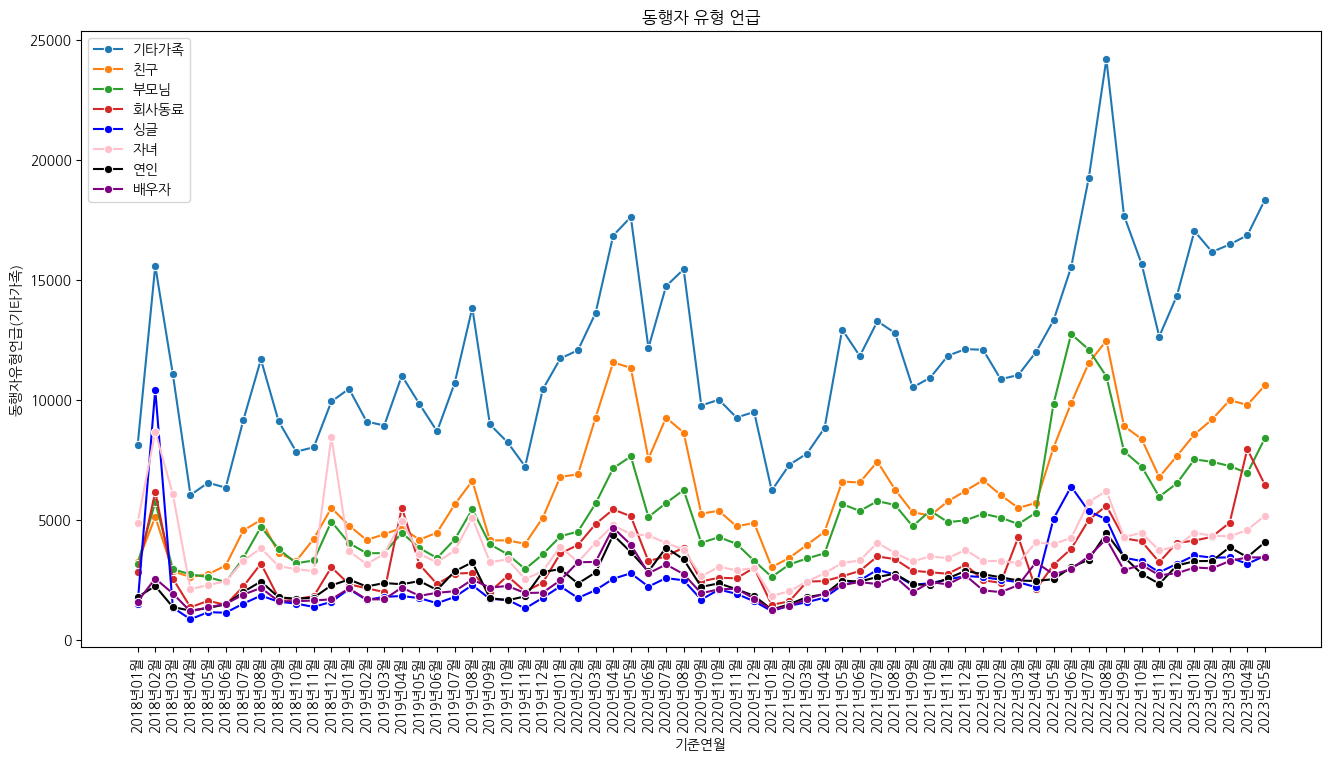

In [100]:
fig, ax = plt.subplots(1,1,figsize=(16,8))

ax= sns.lineplot(x='기준연월', y='동행자유형언급(기타가족)', data=df, marker='o', label='기타가족')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(친구)', data=df, marker='o', label='친구')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(부모님)', data=df, marker='o', label='부모님')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(회사동료)', data=df, marker='o', label='회사동료')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(싱글)', data=df, marker='o', label='싱글', color='blue')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(자녀)', data=df, marker='o', label='자녀', color='pink')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(연인)', data=df, marker='o', label='연인', color='black')
ax= sns.lineplot(x='기준연월', y='동행자유형언급(배우자)', data=df, marker='o', label='배우자', color='purple')
plt.xticks(rotation=90)
plt.title('동행자 유형 언급')
plt.show()

In [50]:
기타가족=df['동행자유형언급(기타가족)'].sum()
친구=df['동행자유형언급(친구)'].sum()
부모님=df['동행자유형언급(부모님)'].sum()
회사동료=df['동행자유형언급(회사동료)'].sum()
싱글=df['동행자유형언급(싱글)'].sum()
자녀=df['동행자유형언급(자녀)'].sum()
연인=df['동행자유형언급(연인)'].sum()
배우자=df['동행자유형언급(배우자)'].sum()

In [51]:
value3=[기타가족, 친구, 부모님, 회사동료, 싱글, 자녀, 연인, 배우자]
labels3=['기타가족','친구','부모님','회사동료', '싱글', '자녀', '연인', '배우자']

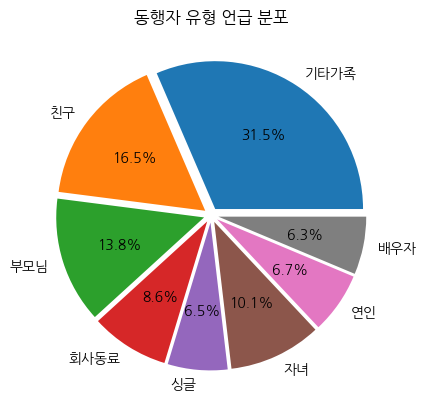

In [75]:
plt.pie(value3, labels=labels3, autopct='%1.1f%%', explode=[0.05,0.05,0.05, 0.05, 0.05,0.05,0.05,0.05,])
plt.title('동행자 유형 언급 분포')
plt.show()


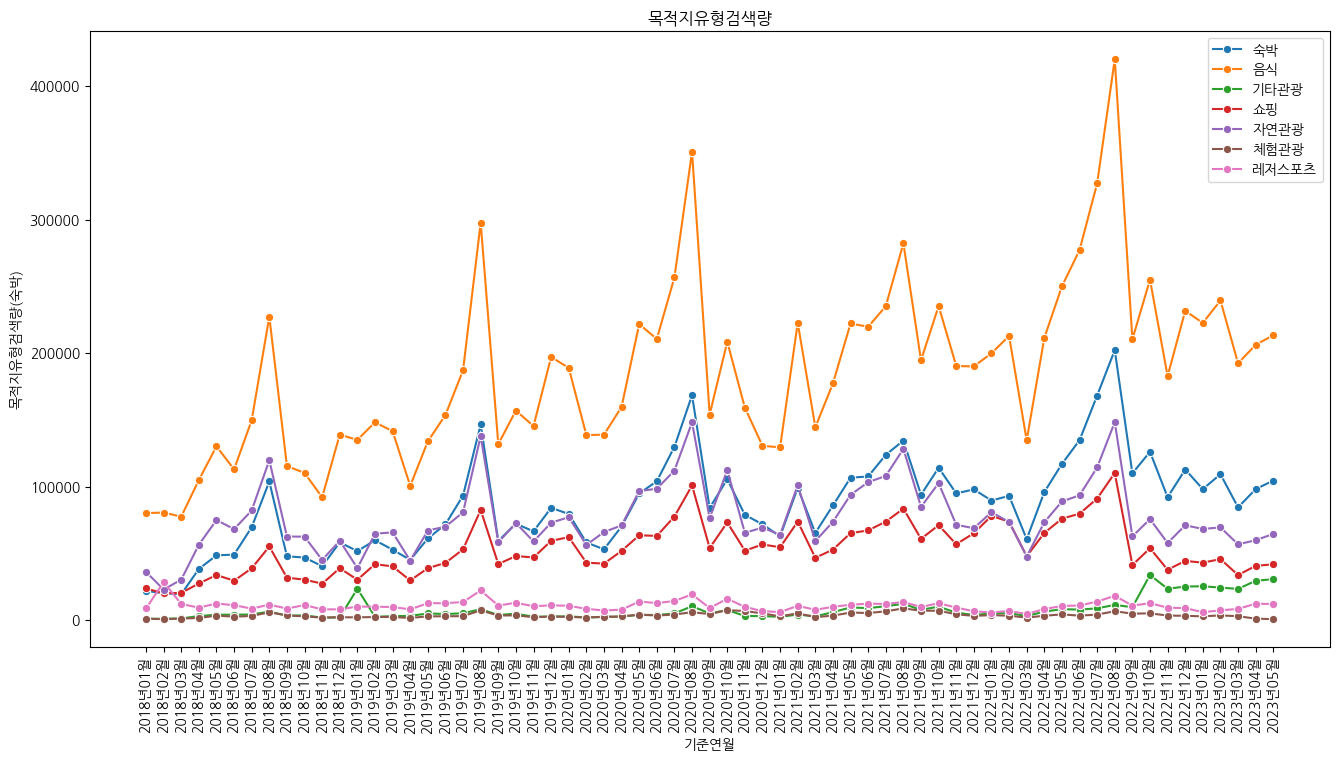

In [86]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

ax= sns.lineplot(x='기준연월', y='목적지유형검색량(숙박)', data=df, marker='o', label='숙박')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(음식)', data=df, marker='o', label='음식')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(기타관광)', data=df, marker='o', label='기타관광')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(쇼핑)', data=df, marker='o', label='쇼핑')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(자연관광)', data=df, marker='o', label='자연관광')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(체험관광)', data=df, marker='o', label='체험관광')
ax= sns.lineplot(x='기준연월', y='목적지유형검색량(레저스포츠)', data=df, marker='o', label='레저스포츠')
plt.xticks(rotation=90)
plt.title('목적지유형검색량')
plt.show()

In [88]:
목적지숙박 = df['목적지유형검색량(숙박)'].sum()
목적지음식 = df['목적지유형검색량(음식)'].sum()
목적지기타관광 = df['목적지유형검색량(기타관광)'].sum()
목적지쇼핑 = df['목적지유형검색량(쇼핑)'].sum()
목적지자연관광 = df['목적지유형검색량(자연관광)'].sum()
목적지체험관광 = df['목적지유형검색량(체험관광)'].sum()
목적지레저스포츠 = df['목적지유형검색량(레저스포츠)'].sum()

In [89]:
value4=[목적지숙박, 목적지음식, 목적지기타관광, 목적지쇼핑, 목적지자연관광, 목적지체험관광, 목적지레저스포츠]
labels4=['숙박','음식','기타관광','쇼핑','자연관광','체험관광','레저스포츠']

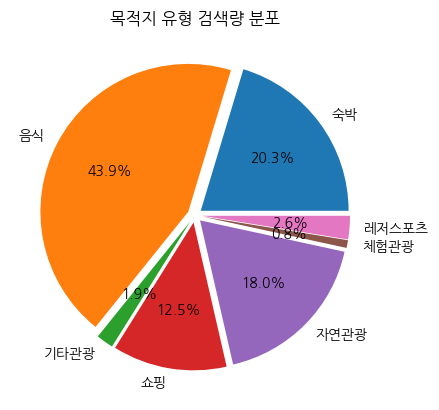

In [92]:
plt.pie(value4, labels=labels4, autopct='%1.1f%%', explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,])
plt.title('목적지 유형 검색량 분포')
plt.show()

In [53]:
df_corr = df.corr(method='pearson')
df_corr

<ipython-input-53-783b2cb505e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr(method='pearson')


,방문자수,숙박방문자수,신용카드소비액(천원),식음료업(천원),쇼핑업(천원),숙박업(천원),여가서비스업(천원),운송업(천원),여행업(천원),무박,...,목적지유형검색량(자연관광),목적지유형검색량(문화관광),목적지유형검색량(역사관광),목적지유형검색량(체험관광),목적지유형검색량(레저스포츠),여행유형/트렌드별검색량(레포츠),여행유형/트렌드별검색량(휴식/힐링),여행유형/트렌드별검색량(체험),여행유형/트렌드별검색량(미식),여행유형/트렌드별검색량(기타)
방문자수,1.000000,0.934552,0.895857,0.916483,0.517926,0.760627,0.601066,0.402771,-0.086504,0.170478,...,0.665635,0.510516,0.526618,0.460098,0.627356,0.570865,0.589636,0.315191,0.264054,0.353697
숙박방문자수,0.934552,1.000000,0.928033,0.940137,0.517701,0.888466,0.632739,0.361591,-0.153191,0.146018,...,0.778001,0.500847,0.610475,0.556405,0.522126,0.527014,0.638255,0.270010,0.305418,0.347493
신용카드소비액(천원),0.895857,0.928033,1.000000,0.990186,0.634042,0.871569,0.730408,0.480717,-0.001947,0.101563,...,0.747121,0.520703,0.642688,0.483211,0.556373,0.524702,0.637225,0.406165,0.317552,0.362853
식음료업(천원),0.916483,0.940137,0.990186,1.000000,0.579236,0.857014,0.709892,0.466893,-0.024950,0.087202,...,0.744317,0.563519,0.642764,0.465723,0.565399,0.555883,0.652226,0.391321,0.310708,0.387239
쇼핑업(천원),0.517926,0.517701,0.634042,0.579236,1.000000,0.479096,0.396378,0.432752,0.101185,0.183850,...,0.437634,0.066539,0.362266,0.285015,0.505000,0.148117,0.227974,0.175179,0.232302,0.147442
숙박업(천원),0.760627,0.888466,0.871569,0.857014,0.479096,1.000000,0.631496,0.256389,-0.147068,0.058627,...,0.793681,0.429185,0.637823,0.581200,0.376271,0.445923,0.667607,0.248041,0.396415,0.351375
여가서비스업(천원),0.601066,0.632739,0.730408,0.709892,0.396378,0.631496,1.000000,0.236127,-0.161110,0.029338,...,0.565922,0.661021,0.801441,0.478150,0.202814,0.408916,0.729843,0.312357,0.031602,0.260200
운송업(천원),0.402771,0.361591,0.480717,0.466893,0.432752,0.256389,0.236127,1.000000,0.292981,0.187269,...,0.043610,0.290834,0.085887,-0.175846,0.368434,0.174618,0.096066,0.500005,0.238814,0.143734
여행업(천원),-0.086504,-0.153191,-0.001947,-0.024950,0.101185,-0.147068,-0.161110,0.292981,1.000000,0.011284,...,-0.162722,-0.235491,-0.216308,-0.241858,0.046069,-0.170761,-0.370976,0.238640,0.044240,-0.244170
무박,0.170478,0.146018,0.101563,0.087202,0.183850,0.058627,0.029338,0.187269,0.011284,1.000000,...,0.023259,-0.029864,-0.023333,0.051723,0.021887,0.017906,0.001637,0.007692,-0.047458,-0.049921


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


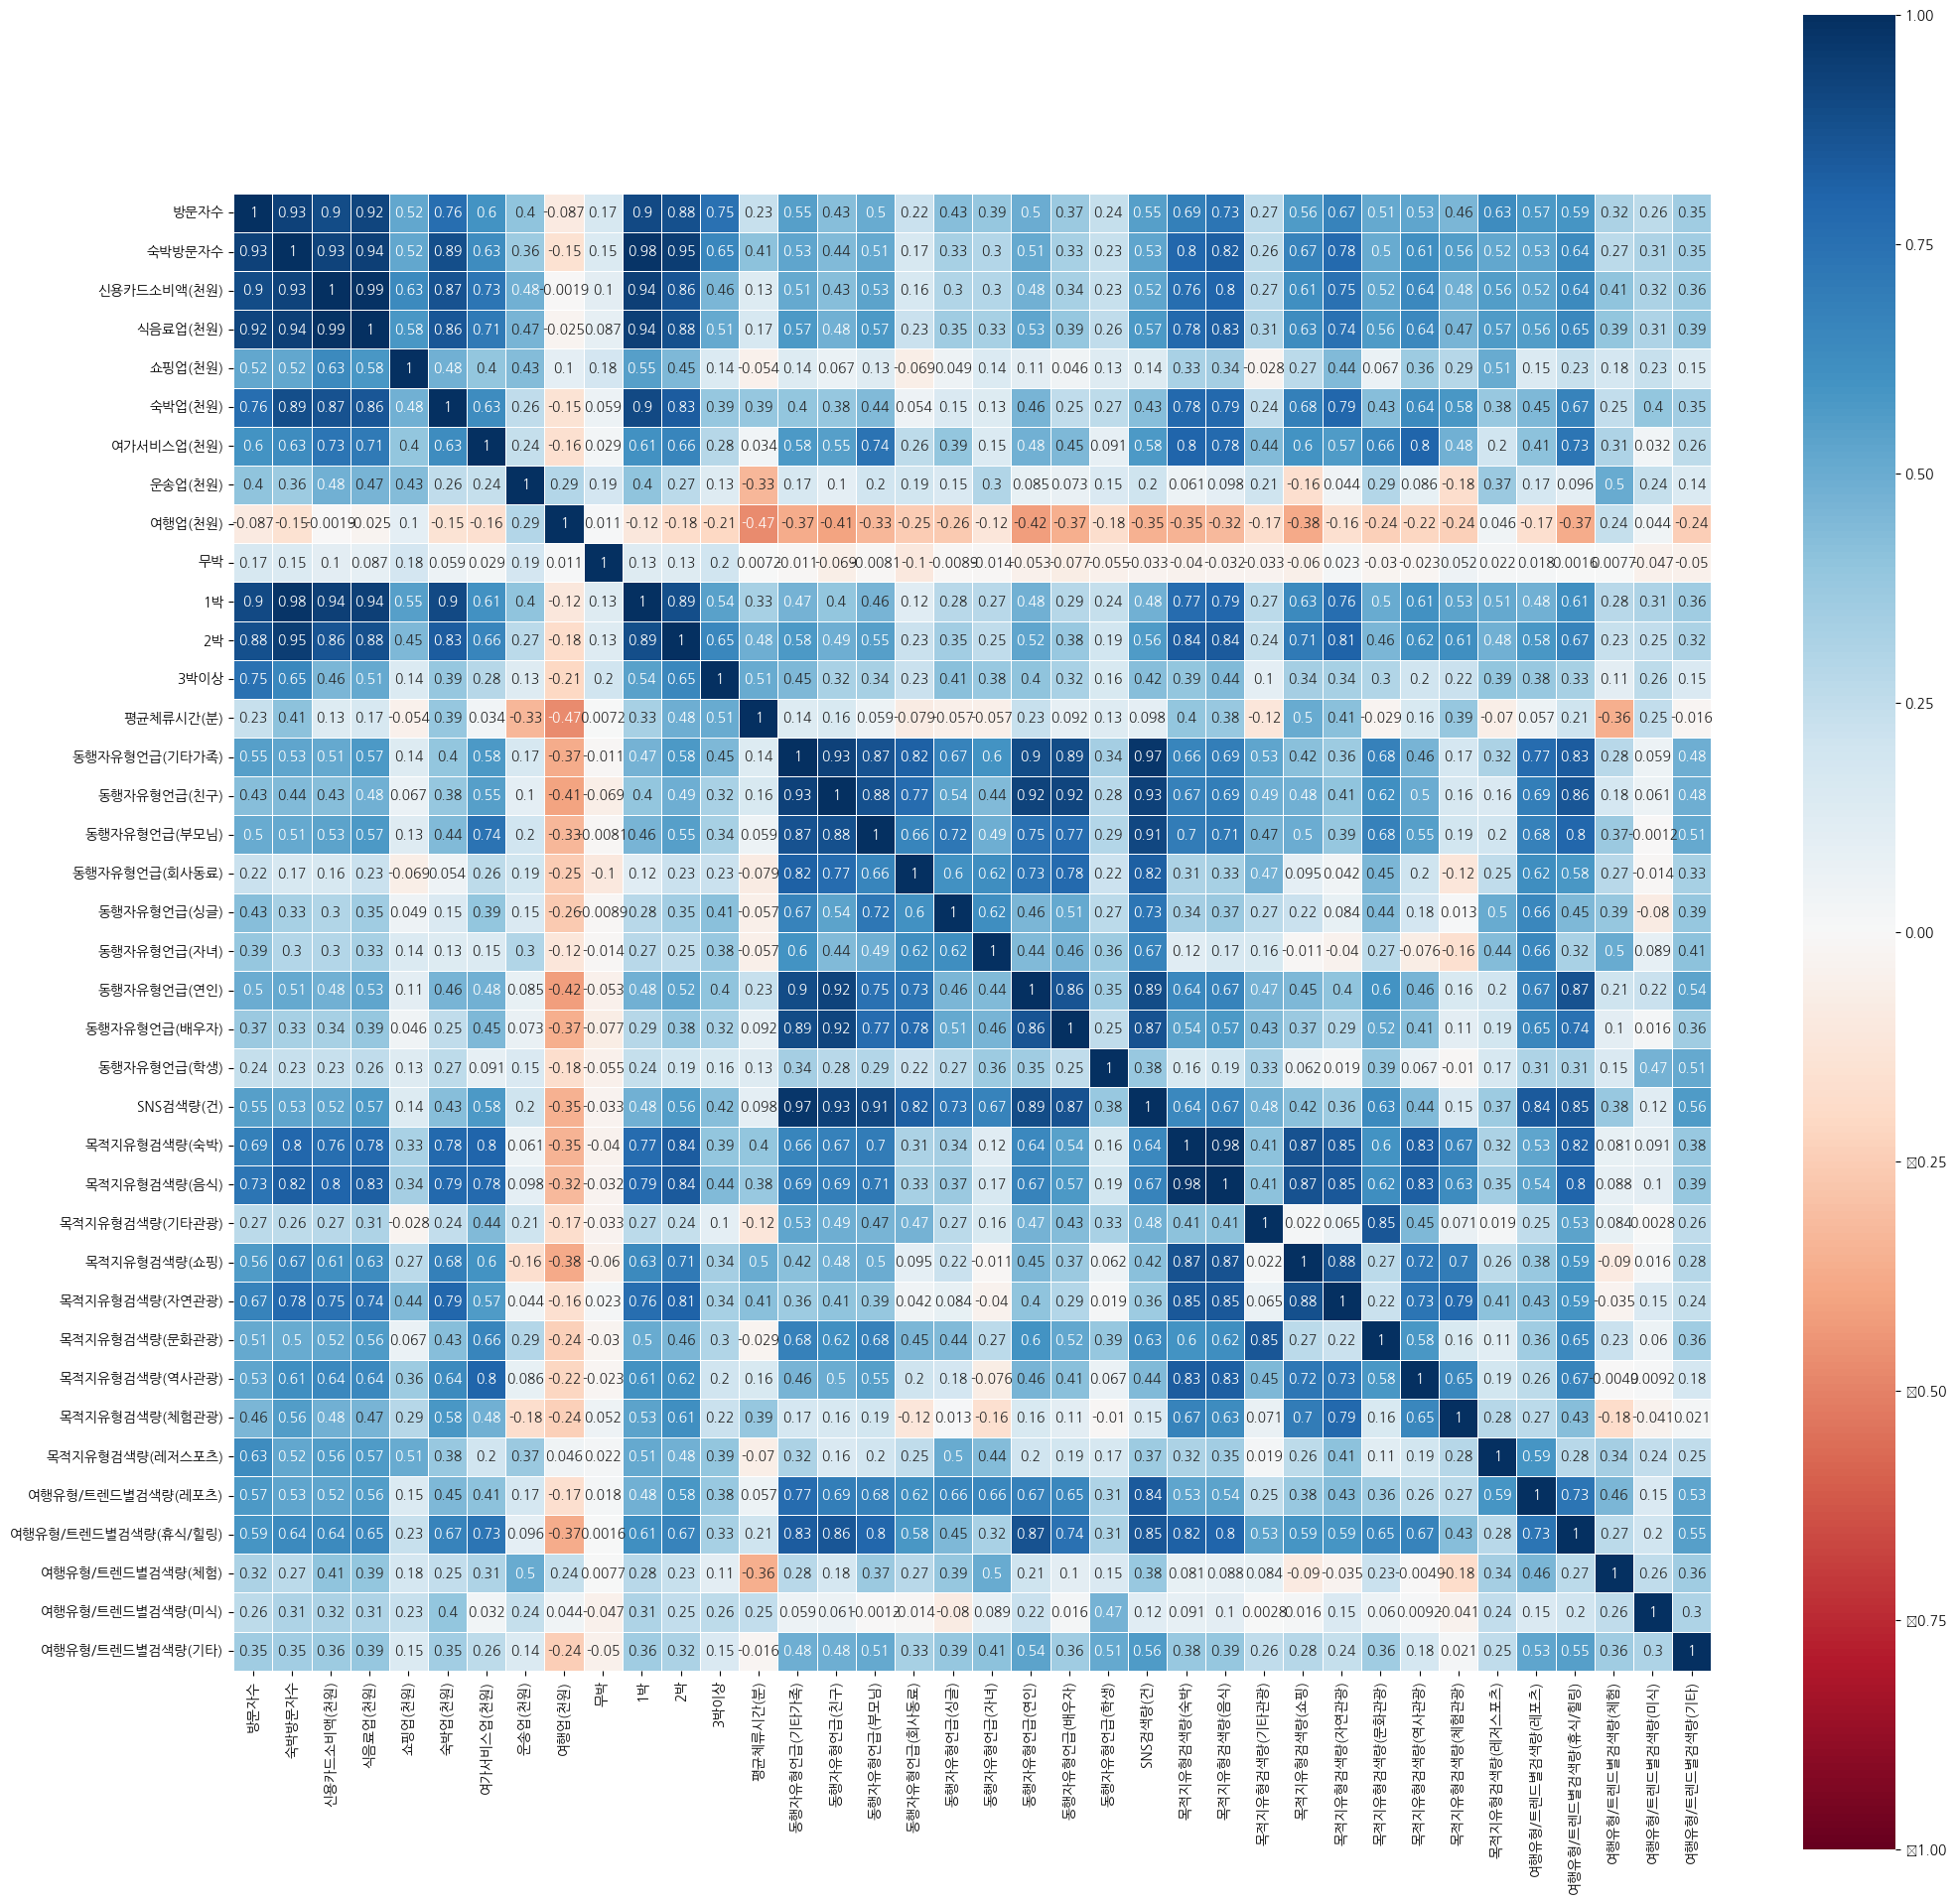

In [54]:
fig = plt.figure(figsize=(24, 24))
ax = fig.add_subplot(1, 1, 1)

sns.heatmap(df_corr, annot=True, square=True, vmin=-1, vmax=1, linewidth=-0.5, cmap='RdBu')

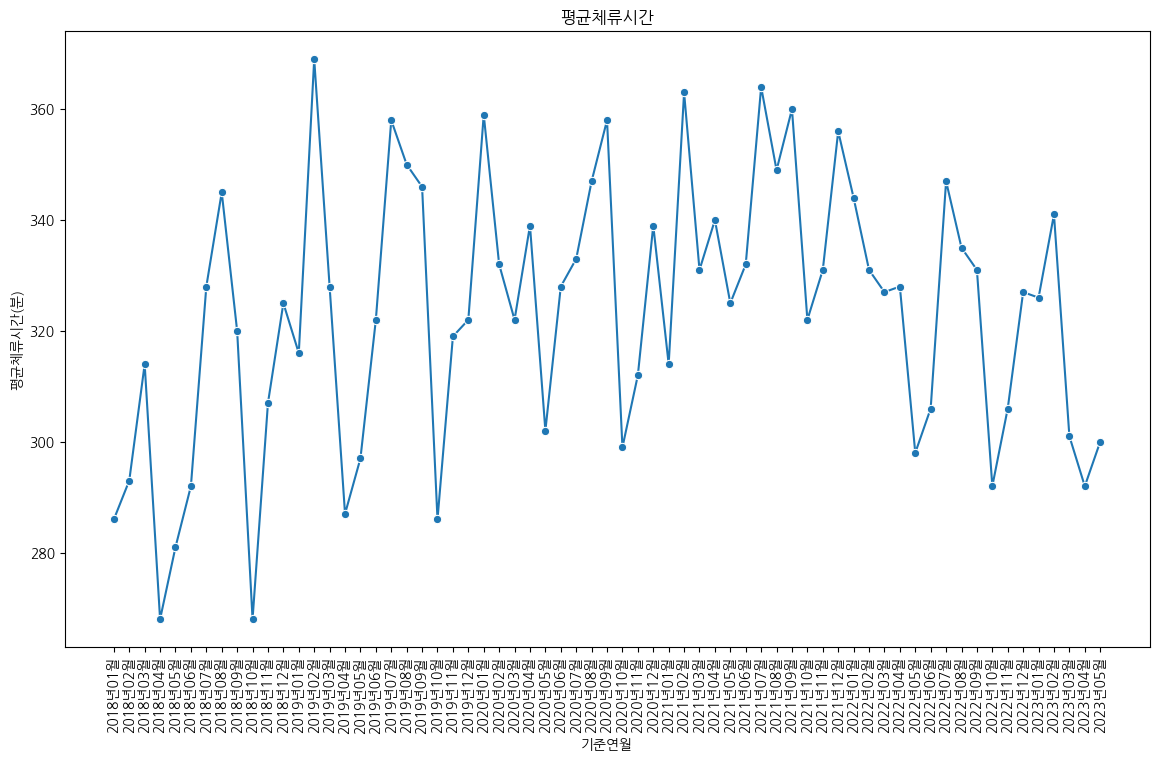

In [55]:
fig, ax = plt.subplots(1,1, figsize=(14,8))
sns.lineplot(x='기준연월', y='평균체류시간(분)', data=df, marker = 'o')
plt.xticks(rotation = 90)
plt.title('평균체류시간')
plt.show()